# Calculate Green's Functions Using Marchenko Methods

In [5]:
# Depedencies
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import signal
from scipy.io import savemat, loadmat
from scipy.signal.windows import tukey
from scipy.fftpack import fft, ifft, fftshift, ifftshift

# The tukey function from scipy.signal.windows generates a Tukey window 
# (also known as a tapered cosine window), which is commonly used 
# in signal processing to reduce spectral leakage when performing Fourier transforms.


## Setting Path Directory

In [6]:
###########################
# Set base directory path #
###########################

base_dir = r'C:\Users\Ahmed\Downloads\Marchenko_for_imaging' # Set to your directory

dat_dir = os.path.join(base_dir, 'UTILS', 'DATA', 'DAT')
mat_dir = os.path.join(base_dir, 'UTILS', 'DATA', 'MAT')

# Create output directory if it doesn't exist
os.makedirs(mat_dir, exist_ok=True)

## Data Preparation for Marchenko Green's Functions Calculation

In [7]:
# def data_preparation():
#     """
#     This script prepares data for Marchenko method calculations. It only needs to be run once.
    
#     This code is the python version of the MATLAB Code that accompanies the paper:
#     An introduction to Marchenko methods for imaging
#     by Angus Lomas and Andrew Curtis
#     https://doi.org/10.1190/geo2018-0068.1
    
#     The SEG version of this code may be found at:
#     http://software.seg.org/2019/0002
#     """
    
#     ######################
#     # LOAD AND SAVE DATA #
#     ######################
    
#     # Function to load all .dat files with appropriate delimiter handling
#     def load_dat_file(filename):
#         """Load .dat file with automatic delimiter detection"""
#         return np.loadtxt(os.path.join(dat_dir, filename), delimiter=",")
    
#     print("Starting data preparation...")
    
#     ############################################
#     # Load and reshape the base reflectivity (R)
#     print("Processing reflectivity data...")
#     sg = load_dat_file('ICCR_marchenko_R_base.dat')       # load base reflectivity (R)
#     sg = sg.reshape((3001, 188, 94), order='F')           # reshape reflectivity (R)
    
#     # Create the full reflectivity by mirroring across receiver and source dimensions
#     sg = np.concatenate([sg, np.flip(np.flip(sg, axis=1), axis=2)], axis=2)    # Uses a list ([...]) as the input to np.concatenate.
#     # sg = np.concatenate((sg, np.flip(np.flip(sg, axis=1), axis=2)), axis=2)    # You could as well use a tuple ((...)) as the input.
    
#     # Save reflectivity (R) to .mat and .npy format
#     np.save(os.path.join(mat_dir, 'ICCR_marchenko_R.npy'), sg)      # save reflectivity (R)
#     savemat(os.path.join(mat_dir, 'ICCR_marchenko_R.mat'), {'sg': sg})
    
#     ############################################
#     # Load and reshape base eikonal data
#     print("Processing eikonal data...")
#     eik = load_dat_file('ICCR_marchenko_eik_base.dat')
#     eik = eik.reshape((201, 375, 94), order='F')
    
#     # Create the full eikonal by mirroring across receiver and source dimensions
#     eik = np.concatenate((eik, np.flip(np.flip(eik, axis=1), axis=2)), axis=2)
    
#     # Save eikonal to .mat and .npy format
#     np.save(os.path.join(mat_dir, 'ICCR_marchenko_eik.npy'), eik)
#     savemat(os.path.join(mat_dir, 'ICCR_marchenko_eik.mat'), {'eik': eik})
    
#     ############################################
#     # Process other data files
#     print("Processing remaining data files...")
#     dat_files = [
#         ('ICCR_marchenko_GT.dat',    'gt',    'ICCR_marchenko_GT'),
#         ('ICCR_marchenko_TD.dat',    'td',    'ICCR_marchenko_TD'),
#         ('ICCR_marchenko_theta.dat', 'theta', 'ICCR_marchenko_theta'),
#         ('ICCR_marchenko_wav.dat',   'wav',   'ICCR_marchenko_wav'),
#         ('ICCR_marchenko_vel.dat',   'vel',   'ICCR_marchenko_vel')
#     ]
    
#     for filename, var_name, save_name in dat_files:
#         data = load_dat_file(filename)
#         np.save(os.path.join(mat_dir, f'{save_name}.npy'), data)
#         savemat(os.path.join(mat_dir, f'{save_name}.mat'), {var_name: data})
    
#     # Save all data in a single .mat file for convenience
#     print("Creating consolidated data file...")
#     all_data = {
#         'sg' : sg,
#         'eik': eik,
#         'gt' : np.load(os.path.join(mat_dir, 'ICCR_marchenko_GT.npy')),
#         'td' : np.load(os.path.join(mat_dir, 'ICCR_marchenko_TD.npy')),
#         'theta': np.load(os.path.join(mat_dir, 'ICCR_marchenko_theta.npy')),
#         'wav'  : np.load(os.path.join(mat_dir, 'ICCR_marchenko_wav.npy')),
#         'vel'  : np.load(os.path.join(mat_dir, 'ICCR_marchenko_vel.npy'))
#     }
#     savemat(os.path.join(mat_dir, 'ICCR_marchenko_all_data.mat'), all_data)
    
#     print("Data preparation complete!")
#     print(f"Processed 7 data files")
#     print(f"Output saved to: {mat_dir}")

# if __name__ == "__main__":
#     data_preparation()

Starting data preparation...
Processing reflectivity data...
Processing eikonal data...
Processing remaining data files...
Creating consolidated data file...
Data preparation complete!
Processed 7 data files
Output saved to: C:\Users\Ahmed\Downloads\Marchenko_for_imaging\UTILS\DATA\MAT


## Data Dimension

In [14]:
print(np.shape(loadmat(os.path.join(mat_dir, 'ICCR_marchenko_R.mat'))["sg"]))
print(np.shape(loadmat(os.path.join(mat_dir, 'ICCR_marchenko_eik.mat'))["eik"]))

print(np.shape(loadmat(os.path.join(mat_dir, 'ICCR_marchenko_TD.mat'))['td']))
print(np.shape(loadmat(os.path.join(mat_dir, 'ICCR_marchenko_theta.mat'))['theta']))
print(np.shape(loadmat(os.path.join(mat_dir, 'ICCR_marchenko_GT.mat'))['gt']))

(3001, 188, 188)
(201, 375, 188)
(3001, 188)
(3001, 188)
(3001, 188)


## Compute the direct arrival and filter for Marchenko implementation.

In [15]:
def marchenko_direct(tt, wav, ns, ts, dt, freq):
    """
    Calculate the direct signal and time-symmetric filter for implementing Marchenko methods.
    
    Parameters:
    tt : array_like
        Travel times between image point and surface receivers (1D array of length ns).
    wav : array_like
        Input wavelet (1D array).
    ns : int
        Number of shot positions (sources).
    ts : int
        Number of time samples.
    dt : float
        Time sampling interval.
    freq : float
        Frequency of the source wavelet.
        
    Returns:
    direct : ndarray
        Direct arrival signal (2D array with dimensions (ts, ns)).
    filter : ndarray
        Time-symmetric filter (2D array with dimensions (ts, ns)). Mute filter.
    """

    # Half the number of time samples + 1, corresponding to non-negative times
    # Initialize direct arrival array (non-negative times)
    ts_half = int(np.floor(ts / 2)) + 1
    # ts_half = ts // 2 + 1

    # Initialize direct arrival matrix (rows: time samples, columns: shots)
    direct = np.zeros((ts_half, ns))
    
    # Assign offset-dependent direct arrival amplitude
    for idx in range(ns):
        # Convert travel time to sample index (0-based)
        sample_index = int(round(tt[idx] / dt))
        # Ensure index is within valid range before assignment
        if 0 <= sample_index < ts_half:  # Ensure index is within bounds
            direct[sample_index, idx] = np.sqrt(1.0 / tt[idx])
    
    # Convolve each direct arrival trace with the input wavelet
    for i in range(ns):
        direct[:, i] = signal.convolve(direct[:, i], wav.flatten(), mode='same')
        # direct[:, i] = np.convolve(direct[:, i], wav, mode='same')
    
    # Initialize filter array (non-negative times)
    filter = np.zeros((ts, ns))
    
    # Calculate filter parameters. # Calculate filter locations based on travel times
    loc = (np.ceil(ts / 2) + np.round(tt / dt)).astype(int)  

    # Define clearance zone length around arrival in number of samples for the filter taper region
    wl = int(round((2 * np.sqrt(3 / 2) / (np.pi * freq)) / dt))  # Clearance zone in samples
    
    # Create offset-dependent mute filter (also known as mute taper) with linear taper
    for idx in range(ns):
        # Set filter to 1 before the clearance zone
        # Calculate index where filter value of 1 ends (start of taper)
        end_ones = loc[idx] - wl  # where ones end

        # Set filter to 1 for samples before the taper region (mute off)
        if end_ones > 0:          # Only set if within bounds
            filter[:end_ones, idx] = 1
        
        # Apply linear taper in the clearance zone
        taper_start     = end_ones                 # where taper starts
        taper_start_idx = max(taper_start - 1, 0)  # Python index (0-based)
        taper_end_idx   = min(taper_start + 5, ts) # Python index (exclusive)
        
        # Set taper values if within bounds
        # Apply linear taper from 1 down to 0 over 6 samples (or fewer near edges)
        if taper_start_idx < ts:
            n_taper    = taper_end_idx - taper_start_idx
            taper_vals = np.linspace(1.0, 0.0, 6)[:n_taper]
            filter[taper_start_idx:taper_end_idx, idx] = taper_vals
    
    # Pad direct arrival with zeros for negative times
    # Pad the direct arrival with zeros on top to match original ts size
    n_pad  = int(np.floor(ts / 2))
    # n_pad  = ts // 2  # Or
    zero_pad = np.zeros((n_pad, ns))
    direct   = np.vstack((zero_pad, direct))
    
    # Make the filter symmetric in time by flipping second half and stacking
    # mid = int(np.ceil(ts/2))
    top  = filter[int(np.ceil(ts / 2)):, :]         # Part above midpoint
    top  = np.flipud(top)                           # Flip vertically
    bottom = filter[int(np.ceil(ts / 2)) - 1:, :]   # Part from midpoint onward
    filter = np.vstack((top, bottom))

    return direct, filter

### **Direct Arrival in Marchenko Imaging**

In Marchenko imaging, the **direct arrival** refers to the **one-way travel time** from the **focusing point (virtual source)** to the **surface receivers**. It is **not** the two-way time (source → focusing point → receiver) or the source-to-focusing-point time.  

---

### **1. What is the Direct Arrival?**
- The direct arrival represents the **first-arriving energy** that travels **directly** from the **focusing point** (image point at depth) to the **receivers** at the surface.
- It is computed using the **eikonal equation** (a high-frequency approximation of wave propagation) to determine the **shortest-time path** from the focusing point to each receiver.

---

### **2. Mathematical Representation**
Direct arrival amplitude is calculated by 

$$\text{direct}(t) = \sqrt{\frac{1}{t_i}} $$

The amplitude is then convolved with the source wavelet.

$$
\text{direct}(t) = \sqrt{\frac{1}{t_i}} \cdot \delta(t - t_i)
$$
where:
- $ t_i $ = one-way travel time from the focusing point to the $i$-th receiver.
- $ \delta(t - t_i) $ = Dirac delta function (impulse at time $t_i$).
- The amplitude decays with $ \sqrt{\frac{1}{t_i}} $ due to geometrical spreading.

---

### **3. How is it Used in Marchenko?**
1. **Initial Focusing Function Estimation**  
   - The direct arrival is **time-reversed** to initialize the **downgoing focusing function** $ f_0^+ $:
     $$
     f_0^+(\omega) = \text{FFT}(\text{direct}(-t))
     $$
   - This represents the **wavefield that would focus energy** at the image point.

2. **Filtering the Upgoing Response**  
   - The direct arrival is used to define a **time window** (filter) that isolates primary reflections and suppresses unwanted multiples.

3. **Constructing Green’s Functions**  
   - The direct arrival helps separate the **upgoing** ($ G^- $) and **downgoing** ($ G^+ $) Green’s functions.

---

### **4. Why Not Two-Way Time?**
- The Marchenko method **does not rely on a physical source** at the surface. Instead, it uses **virtual sources** (focusing points) inside the medium.
- The direct arrival is **one-way** (focusing point → receiver) because:
  - The **focusing function** $ f^+ $ represents the **downgoing field** needed to focus at the image point.
  - The **upgoing response** $ f^- $ contains **scattered energy** from the subsurface.

---

### **5. Comparison with Seismic Data**
| **Term**               | **Marchenko (Focusing Scheme)** | **Conventional Seismic** |
|------------------------|--------------------------------|--------------------------|
| **Direct Arrival**      | One-way (focusing point → receiver) | Two-way (source → reflector → receiver) |
| **Purpose**            | Initialize focusing functions | First-break picking (for statics) |
| **Amplitude Scaling**  | $ \sqrt{\frac{1}{t}} $ (geometrical spreading) | Source wavelet |

---

### **6. Key Notes**
- The direct arrival in Marchenko is **not** the same as the first break in seismic data.
- It is a **one-way travel time** used to **focus energy** at a subsurface point.
- The method avoids needing a source at the surface by using **virtual focusing**.
- The direct arrival helps **separate primary reflections from multiples**, improving imaging.

This distinction is crucial for correctly implementing **Marchenko-based redatuming and imaging**.

## Green's Functions Using Marchenko Methods

The function computes the green's function from the iterative focusing function starting with an initial estimate from the direct arrival.  

In [16]:
def marchenko_green_function(direct, filter, sg, nitr):
    """
    Calculate Green's Functions Using Marchenko Methods
    
    Parameters:
    direct : ndarray
        Estimated direct arrival between image point and surface receivers (time domain, shape: (ts, ns))
    filter : ndarray
        Time-symmetric filter to window focusing functions (time domain, shape: (ts, ns)). Window function used to filter the focusing functions.
    sg : ndarray
        Measured reflectivity data (frequency domain, shape: (ts, nshots, nreceivers))
    nitr : int
        Number of Marchenko iterations
        
    Returns:
    g_plus : ndarray
        Downgoing Green's function (time domain) (nt, ns).
    g_minus : ndarray
        Upgoing Green's function (time domain) (nt, ns).
    g_total : ndarray
        Total Green's function - (g_plus + g_minus) (time domain)
    """
    ts, ns = direct.shape  # Number of time samples (ts or nt)  and shots

#########################################################
####### 1) FOCUSING FUNCTIONS - INITIAL ESTIMATES #######
#########################################################
    print("Initializing focusing functions...")
    # Time-reverse direct arrival and convert to frequency domain
    f0_plus_freq = np.fft.fft(np.flipud(direct), axis=0)  # Equ. 3 (in frequency domain)
    
    # Convolve reflectivity (sg) with f0_plus_freq (frequency domain multiplication and sum over receivers)
    f0_minus = np.sum(sg * f0_plus_freq[:, np.newaxis,:], axis=2)             # Equ. 4 part 1
    
    # Convert to time domain, apply ifftshift on time axis, take real part, and window with filter
    f0_minus_time          = np.real(np.fft.ifft(f0_minus, axis=0))       # convert to time domain
    f0_minus_time_shift    = np.fft.ifftshift(f0_minus_time, axes=0)      # apply ifftshift on time axis
    f0_minus_time_windowed = filter * f0_minus_time_shift                 # apply mute filter # Equ. 4 part 2 
    
    # Compute time-reversed and non-reversed versions in frequency domain
    fk_minus_tr   = np.fft.fft(np.flipud(f0_minus_time_windowed), axis=0) # time-reversed and transformed back to frequency domain
    f0_minus_freq = np.fft.fft(f0_minus_time_windowed, axis=0)            # also get frequency version (non-reversed)

#########################################################    
#### 2) FOCUSING FUNCTIONS - ITERATIVE CALCULATION ######
#########################################################
    print(f"Starting iterative calculation ({nitr} iterations)...")
    for itr in range(nitr):

        # mk_plus: update downgoing focusing function
        # Convolve reflectivity with fk_minus_tr (time-reversed f0_minus) 
        mk_plus = np.sum(sg * fk_minus_tr[:,np.newaxis,:], axis=2)  # Equ. 5 part 1
        
        # Convert to time domain, apply ifftshift, take real part, window, then time-reverse and FFT
        mk_plus_time          = np.real(np.fft.ifft(mk_plus, axis=0))
        mk_plus_time_shift    = np.fft.ifftshift(mk_plus_time, axes=0)
        mk_plus_time_windowed = filter * mk_plus_time_shift
        mk_plus_freq          = np.fft.fft(np.flipud(mk_plus_time_windowed), axis=0)  # Equ. 5 part 2


        # fk_minus: update upgoing focusing function. fk_minus = f0_minus + filtered IFFT of convolution of sg and mk_plus
        
        # Convolve reflectivity with mk_plus
        fk_minus  = np.sum(sg * mk_plus_freq[:,np.newaxis, :], axis=2)  # Equ. 6 part 1
        
        # Convert to time domain and apply ifftshift
        fk_minus_time       = np.real(np.fft.ifft(fk_minus, axis=0))
        fk_minus_time_shift = np.fft.ifftshift(fk_minus_time, axes=0)
        
        # Retrieve initial f0_minus in time domain
        part1 = np.real(np.fft.ifft(f0_minus_freq, axis=0))
        
        # Window the combined signal
        fk_minus_time_windowed = filter * (part1 + fk_minus_time_shift)  # Equ. 6 part 2
        
        # Update frequency-domain representations
        fk_minus_tr   = np.fft.fft(np.flipud(fk_minus_time_windowed), axis=0)
        fk_minus_freq = np.fft.fft(fk_minus_time_windowed, axis=0)
    
    # Total downgoing focusing function
    fk_plus_freq = f0_plus_freq + mk_plus_freq

#########################################################   
########    3) CALCULATE GREEN'S FUNCTIONS        #######
#########################################################
    print("Calculating Green's functions...")
    # Upgoing Green's function
    # g_minus: upgoing response from fk_plus
    g_minus_freq       = np.sum(sg * fk_plus_freq[:,np.newaxis, :], axis=2)  # Equ. 2/9 part 1
    g_minus_time       = np.real(np.fft.ifft(g_minus_freq, axis=0))
    g_minus_time_shift = np.fft.ifftshift(g_minus_time, axes=0)
    g_minus            = -np.real(np.fft.ifft(fk_minus_freq, axis=0)) + g_minus_time_shift  # Equ. 2/9 part 2
    
    # Downgoing Green's function
    # g_plus: downgoing response from fk_minus_tr (this is same as time reversed f0_minus_freq)
    g_plus_freq        = np.sum(sg * fk_minus_tr[:,np.newaxis, :], axis=2)  # Equ. 1/8 part 1
    g_plus_time        = np.real(np.fft.ifft(g_plus_freq, axis=0))
    g_plus_time_shift  = np.fft.ifftshift(g_plus_time, axes=0)
    g_plus             = np.flipud(np.real(np.fft.ifft(fk_plus_freq, axis=0))) - g_plus_time_shift  # Equ. 1/8 part 2
    
    # Total Green's function
    g_total = g_minus + g_plus

#########################################################    
###############    4) POST-PROCESSING      ##############
#########################################################

    # Normalize by maximum absolute amplitude
    max_amp = np.max(np.abs(g_total))
    g_total = g_total / max_amp
    g_plus  = g_plus  / max_amp
    g_minus = g_minus / max_amp
    
    # Apply pre-direct arrival mute using inverted filter
    filter2 = 1 - filter
    g_total = g_total * filter2
    g_plus  = g_plus  * filter2
    g_minus = g_minus * filter2

    # Convert focusing functions to time domain and normalize
    f0_plus_time  = np.real(np.fft.ifft(f0_plus_freq, axis=0))
    f0_minus_time = np.real(np.fft.ifft(f0_minus_freq, axis=0))
    fk_plus_time  = np.real(np.fft.ifft(fk_plus_freq, axis=0))
    fk_minus_time = np.real(np.fft.ifft(fk_minus_freq, axis=0))
    
    fk_plus_max    = np.max(np.abs(fk_plus_time))
    f0_plus_time  /= fk_plus_max
    f0_minus_time /= fk_plus_max
    fk_minus_time /= fk_plus_max
    fk_plus_time  /= fk_plus_max
#########################################################
    
    return g_plus, g_minus, g_total

## Main Function

Initializing focusing functions...
Starting iterative calculation (5 iterations)...
Calculating Green's functions...
Generating plots...


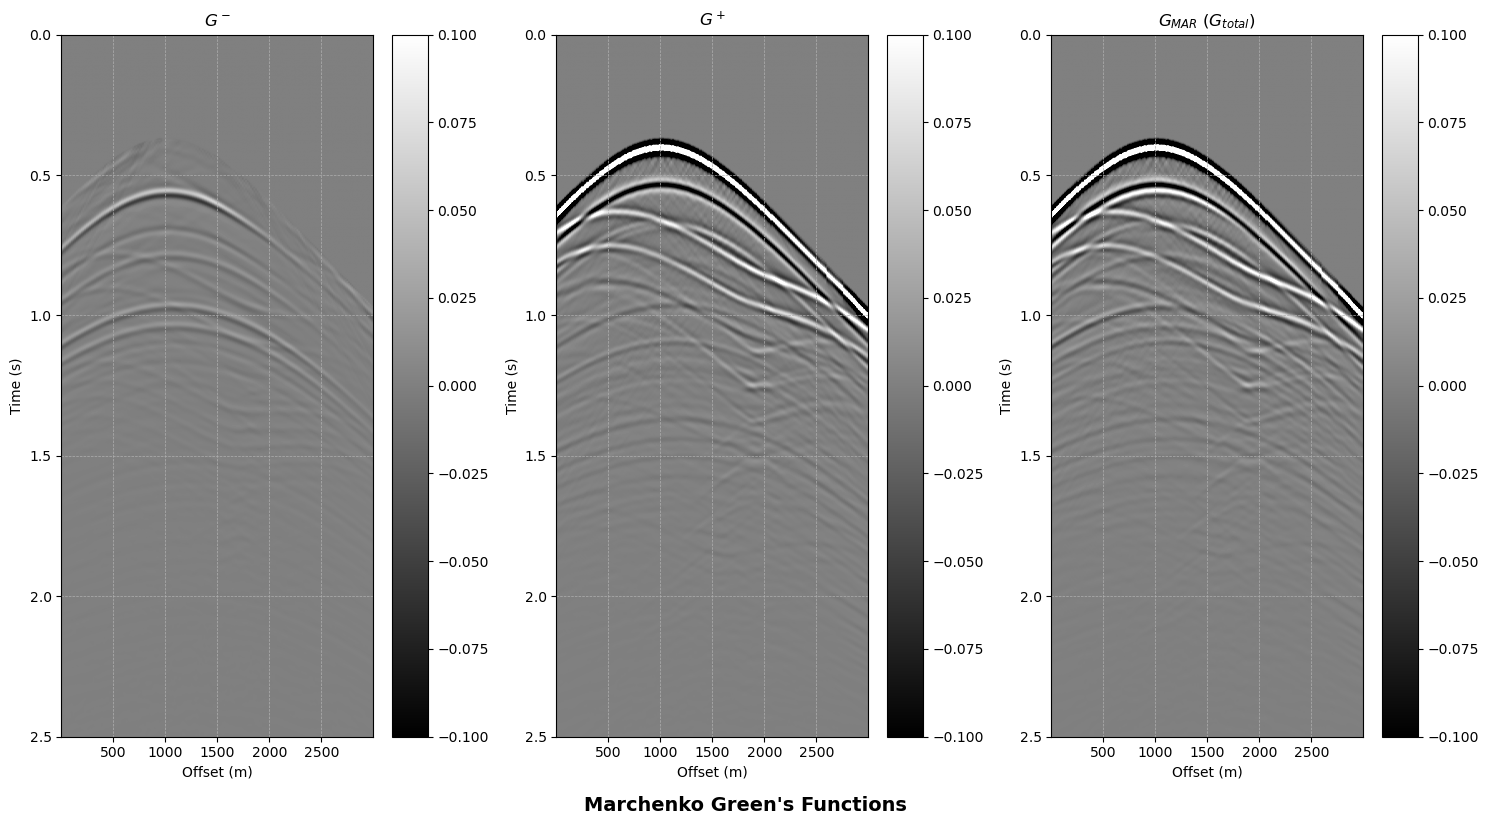

In [18]:
############################################
# 1) USER INPUT - SETUP VARIABLES

# MARCHENKO DEPENDANT PARAMETERS
nitr    = 5                    # Number of Marchenko iterations (more iterations = longer run time)
tp      = 0.2                  # Marchenko taper fraction - defined as a fraction of the number of receivers
scaling = 1                    # Scaling factor for reflectivity
dxm     = 8                    # grid spacing for eikonal solution
x       = 1000                 # x coordinate of image point
z       = 800                  # z coordinate of image point

# SURVEY DEPENDANT PARAMETERS
dt      = 0.002                # Time sampling interval (seconds)
dx      = 16                   # Receiver spacing (meters)
o_min   = 4                    # Initial receiver offset (meters)
freq    = 20                   # frequency of Ricker wavelet

plt_flag = 'y'                 # Plot figures? 'y' or 'n'

############################################
# 2) LOAD DATA
# sg  = loadmat(base_dir + r"\UTILS\DATA\MAT\ICCR_marchenko_R.mat")['sg']      # Reflectivity
# eik = loadmat(base_dir + r"\UTILS\DATA\MAT\ICCR_marchenko_eik.mat")['eik']   # Eikonal travel times
# wav = loadmat(base_dir + r"\UTILS\DATA\MAT\ICCR_marchenko_wav.mat")['wav']   # Wavelet

############################################
# 2) LOAD DATA
try:
    sg, eik, wav = (
        loadmat(os.path.join(mat_dir, fname))[key]
        for key, fname in zip(['sg', 'eik', 'wav'], [
            'ICCR_marchenko_R.mat',
            'ICCR_marchenko_eik.mat',
            'ICCR_marchenko_wav.mat'
        ])
    )
except KeyError as e:
    print(f"Key not found in .mat file: {e}")
except FileNotFoundError as e:
    print(f"File not found: {e}")
except Exception as e:
    print(f"An error occurred: {e}")
    
############################################
# 3) AUTOMATICALLY DEFINED VARIABLES
ns    = sg.shape[1]                          # Number of receivers
ro    = np.arange(o_min, o_min + ns*dx, dx)  # Receiver offset vector
ts    = sg.shape[0]                          # Number of time samples
max_t = (ts//2) * dt                         # Maximum recording time
# max_t = int(np.floor(ts / 2)) * dt           # Maximum recording time

# Scale reflectivity and transform to frequency domain
sg_fft = np.fft.fft(sg * (-2 * dt * dx * scaling), axis=0)

# Create and apply taper to receiver array
# tap = np.zeros(ns)
# n_tap = int(tp * ns)
# if n_tap > 0:
#     tap[:n_tap]  = 0.5 - 0.5 * np.cos(np.pi * np.arange(1, n_tap + 1) / (n_tap))
#     tap[-n_tap:] = 0.5 - 0.5 * np.cos(np.pi * np.arange(n_tap, 0, -1) / (n_tap))
# sg_fft *= tap  # Apply taper

############################################
# You could as well use the tukey function directly in scipy.signal package. use or modify the above if you want to design your own taper
# Apply tapering window across receiver dimension
tap     = tukey(ns, tp)
sg_fft *= tap[np.newaxis, :]
# sg_fft *= tap
############################################

############################################
# 4) MARCHENKO IMAGING
# Extract travel times for image point from eikonal solution
ix = int(round(x / dxm))
iz = int(round(z / dxm))
tt = eik[iz, ix, :].flatten()  

# Calculate direct arrival and filter
direct, filter = marchenko_direct(tt, wav, ns, ts, dt, freq)

# Estimate decomposed Green's functions
g_plus, g_minus, g_total = marchenko_green_function(direct, filter, sg_fft, nitr)

############################################
# 5) FIGURES
if plt_flag.lower() == 'y':
    print("Generating plots...")
    time_axis = np.arange(0, max_t, dt)[:ts//2]
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 8))
    titles = [r'$G^-$', r'$G^+$', r'$G_{MAR} \; (G_{total})$']
    data = [g_minus[ts//2:], g_plus[ts//2:], g_total[ts//2:]]
    
    for i, ax in enumerate(axs):
        im = ax.imshow(data[i][:len(time_axis)], 
                      aspect='auto',
                      extent=[ro.min(), ro.max(), max_t, 0],
                      vmin=-0.1, vmax=0.1,
                      cmap='gray')
        ax.set_xlabel('Offset (m)')
        ax.set_ylabel('Time (s)')
        ax.set_title(titles[i])
        ax.set_ylim(max_t-0.5, 0)
        ax.grid(True, linestyle='--', linewidth=0.5)  # Dashed, thin gridlines
        fig.colorbar(im, ax=ax)

    # Add suptitle *below* the subplots
    fig.text(0.5, -0.02, 'Marchenko Green\'s Functions', ha='center', fontsize=14, fontweight='bold')
    plt.subplots_adjust(bottom=0.15)  # Add space at bottom for title
    plt.tight_layout()
    plt.show()
############################################


## Key References

---

1. **Lomas, Angus**, and **Andrew Curtis**. "An introduction to Marchenko methods for imaging." *Geophysics* 84, no. 2 (2019): F35-F45. Download the paper [here](https://pubs.geoscienceworld.org/seg/geophysics/article/84/2/F35/569232/An-introduction-to-Marchenko-methods-for-imagingAn)